In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
class Value:
    def __init__(self, data, _children=(), _op="", label=""):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
        self.grad = 0 
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out 

In [9]:
## Visualization 
%pip install graphviz

from graphviz import Digraph


Note: you may need to restart the kernel to use updated packages.


In [22]:
def trace(root):
    nodes, edges = set(), set()
    def build(v): 
        if v not in nodes: 
            nodes.add(v)
            for child in v._prev: 
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges 

def draw_dot(root): 
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})
    nodes, edges = trace(root)
    for n in nodes: 
        uid = str(id(n))
        dot.node(name = uid, label="{ %s | data %.4f | grad %-4f}" % (n.label, n.data, n.grad), shape="record" )
        if n._op:
            dot.node(name=uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
            
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

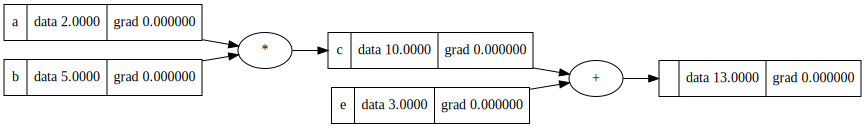

In [23]:
a = Value(2, label="a")
b = Value(5, label="b")

c = a*b
c.label = "c"
d = c + Value(3, label="e")

draw_dot(d)